Import and loding data

In [ ]:
![ -f testDataSmall.npz ] || wget -O testDataSmall.npz "https://www.win.tue.nl/~cdecampos/testDataSmall.npz"
![ -f trainDataSmall.npz ] || wget -O trainDataSmall.npz "https://www.win.tue.nl/~cdecampos/trainDataSmall.npz"
import numpy as np
#import png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import cv2
data_train = np.load('trainDataSmall.npz')
data_test = np.load("testDataSmall.npz")
#!pip install pypng

Separating image data and classification data

In [ ]:
lst_train = data_train.files

for item in lst_train:
    X_train_array = data_train["X_train"]
    Y_train_array = data_train["Y_train"]

Separating image data and classification data


In [ ]:
lst_test = data_test.files

for item in lst_test:
    X_test_array = data_test["X_test"]
    Y_test_array = data_test["Y_test"]

Displaying data shape

In [ ]:
print(X_train_array.shape)
print(X_train_array[0].shape)
print(X_train_array[0])

(5000, 128, 128, 3)
(128, 128, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


Visualizing 30 images

In [ ]:
def process(arrayname: str=None) -> None:
    """
    View multiple images stored in dataset, stacking vertically

    Arguments:
        arrayname: str - name of dataset that stores images
    """
    image = np.asarray(arrayname * 255, dtype=np.uint8)
    plt.figure()
    plt.imshow(image)

for image in X_train_array[:30]:
    process(image)

Output hidden; open in https://colab.research.google.com to view.

Y_train array


In [ ]:
for value in Y_train_array:
    print(value)

Streaming output truncated to the last 5000 lines.
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0

In [ ]:
Separating the image label

In [ ]:
list_index_0 = []
list_index_1 = []
list_index_2 = []
list_index_3 = []
list_index_4 =  []
i = 0
for value in Y_train_array:
    if value[0] == 1:
        list_index_0.append(i)
    if value[1] == 1:
        list_index_1.append(i)
    if value[2] == 1:
        list_index_2.append(i)
    if value[3] == 1:
        list_index_3.append(i)
    if value[4] == 1:
        list_index_4.append(i)
    i += 1

Merging images and labels

In [ ]:
X_train_0 = []
X_train_1 = []
X_train_2 = []
X_train_3 = []
X_train_4 = []
for i in list_index_0:
    X_train_0.append(X_train_array[i])
for j in list_index_1:
    X_train_1.append(X_train_array[j])
for k in list_index_2:
    X_train_2.append(X_train_array[k])
for l in list_index_3:
    X_train_3.append(X_train_array[l])
for m in list_index_4:
    X_train_4.append(X_train_array[m])

Image mean

In [ ]:
imagem_all = np.average(X_train_array,axis=0)
imagem_0 = np.average(X_train_0,axis=0)
imagem_1 = np.average(X_train_1,axis=0)
imagem_2 = np.average(X_train_2,axis=0)
imagem_3 = np.average(X_train_3,axis=0)
imagem_4 = np.average(X_train_4,axis=0)


Display image mean

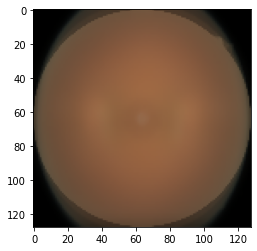

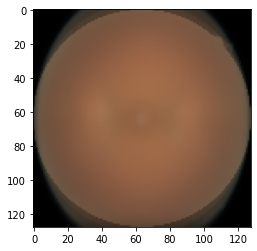

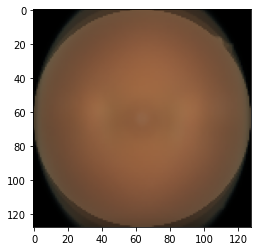

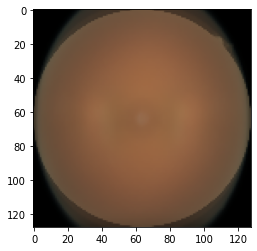

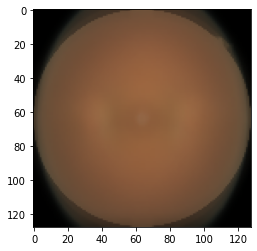

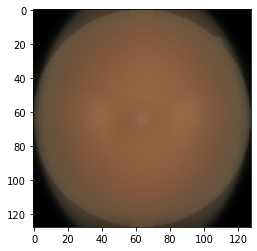

In [ ]:
#Mean of all images
process(imagem_all)
#Mean of all images with no symptoms
process(imagem_0)
#Mean of all images with mild symptoms
process(imagem_1)
#Mean of all images with moderate symptoms
process(imagem_2)
#Mean of all images with severe symptoms
process(imagem_3)
#Mean of all images with proliferative DR symptoms
process(imagem_4)

In [ ]:
Exploring difference between means

In [ ]:
(imagem_1-imagem_0)*255

array([[[-0.007965 , -0.02402  , -0.02104  ],
        [-0.01697  , -0.05203  , -0.01697  ],
        [ 0.00298  , -0.022    ,  0.001034 ],
        ...,
        [-0.022    , -0.044    , -0.05606  ],
        [ 0.02396  , -0.004013 , -0.002007 ],
        [ 0.015015 , -0.02298  , -0.014046 ]],

       [[-0.015015 , -0.03497  , -0.03003  ],
        [ 0.       , -0.00304  ,  0.007965 ],
        [-0.00997  , -0.02505  , -0.01903  ],
        ...,
        [ 0.00602  , -0.02007  , -0.02602  ],
        [ 0.001034 , -0.001034 , -0.02396  ],
        [-0.0009727, -0.02396  , -0.01295  ]],

       [[ 0.007053 , -0.03302  , -0.011    ],
        [-0.008995 , -0.042    , -0.019    ],
        [ 0.01799  , -0.008026 , -0.00298  ],
        ...,
        [ 0.02298  , -0.025    , -0.025    ],
        [ 0.00596  , -0.00997  , -0.01897  ],
        [ 0.00997  , -0.03204  , -0.008995 ]],

       ...,

       [[ 0.01301  , -0.02301  ,  0.02098  ],
        [ 0.007965 , -0.01897  ,  0.013985 ],
        [ 0.01495  , -

In [ ]:
Data distribution bar chart 

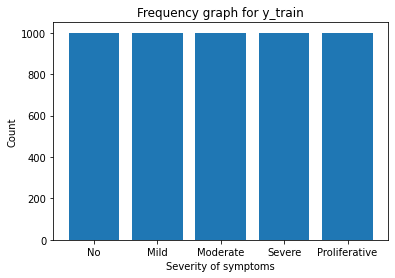

In [ ]:
names = ["No", "Mild", "Moderate", "Severe", "Proliferative"]
count_list = [len(list_index_0), len(list_index_1), len(list_index_2), len(list_index_3), len(list_index_4)]
plt.bar(names, count_list)
plt.title("Frequency graph for y_train")
plt.xlabel("Severity of symptoms")
plt.ylabel("Count")
plt.savefig("frequency graph for x_train");

Gray scale visualization 

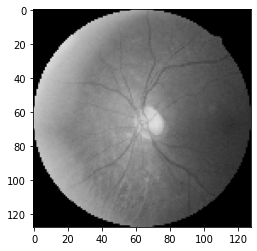

In [ ]:
gray = cv2.cvtColor(Image1, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)

Edge detection

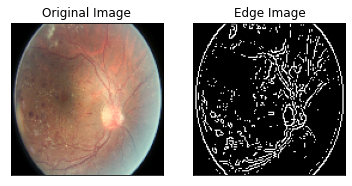

In [ ]:
four_case = np.asarray(X_train_array[4000] * 255, dtype=np.uint8)
edges = cv2.Canny(four_case,100,100)
img = four_case
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import shutil 
import time
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

def model_fn(labels_dim):
    """Create a Keras Sequential model with layers."""
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                                  activation='relu', 
                                  input_shape=(128, 128, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(labels_dim, activation='softmax', kernel_initializer='glorot_uniform'))
    model.summary()
    compile_model(model)
    return model


def compile_model(model):
    opt = keras.optimizers.Adagrad(lr=0.01)
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model


def read_train_data():
    start_time = time.time()
    print("Start Read Train Data")
    data = np.load("trainDataSmall.npz")
    print("Train data read --- %s seconds ---" % (time.time() - start_time))
    X_train = data["X_train"]
    Y_train = data["Y_train"]
    print("Training - Total examples per class", np.sum(Y_train, axis=0))
    return [X_train, Y_train]


def read_test_data():
    start_time = time.time()
    print("Start Read Test Data")
    data = np.load("testDataSmall.npz")
    print("Test data read --- %s seconds ---" % (time.time() - start_time))
    X_test = data["X_test"]
    Y_test = data["Y_test"]
    print("Testing - Total examples per class", np.sum(Y_test, axis=0))
    return [X_test, Y_test]


def get_latest(checkpoint_dir, filetype='.h5', signature='cp', overwrite=False):
    """ 
        This is a workaround as tf.train.latest_checkpoint does not seem to
        work well on codalab. Give preference to that function when possible.

        If overwrite is True, the latest checkpoint is reset to 0 and all 
        others are deleted.
    """
    latest = None
    latest_number = -1
    for filename in os.listdir(checkpoint_dir):
        reference, extension = os.path.splitext(filename)
        if extension == filetype and reference.startswith('cp'):
            number = int(re.sub(r"\D", "", reference))
            if number > latest_number:
                latest = filename
                latest_number = number
            else:
                if overwrite:
                    os.remove(os.path.join(checkpoint_dir, filename))
    if latest is None:
        raise ValueError('No previous checkpoint found.')
    if overwrite:
        os.rename(os.path.join(checkpoint_dir, latest), os.path.join(checkpoint_dir, 'cp-0000.h5'))
        latest = 'cp-0000.h5'
        shutil.rmtree(os.path.join(checkpoint_dir, 'logs')) 
    return os.path.join(checkpoint_dir, latest)


In [2]:
from keras.utils.vis_utils import plot_model
plot_model(model_fn(5), show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [3]:
CLASS_SIZE = 5
FILE_PATH = 'cp-{epoch:04d}.h5'
RETINOPATHY_MODEL = 'retinopathy.h5'


def run(num_epochs=20,  # Maximum number of epochs on which to train
        train_batch_size=40,  # Batch size for training steps
        job_dir='jobdir', # Local dir to write checkpoints and export model
        checkpoint_epochs='epoch',  #  Save checkpoint every epoch
        load_previous_model=False):
  
    """ This function trains the model for a number of epochs and returns the 
        training history. The model is periodically saved for later use.

        You can load a pre-trained model with 
            `model.load_weights(cp_path)`
        where `model` is a keras object (e.g. as returned by `model_fn`) and 
        `cp_path` is the path for the checkpoint you want to load.
        
        Setting load_previous_model to True will load the latest checkpoint in
        `job_dir` and continue training. That checkpoint is renamed cp-0000.h5,
        while all logs and other checkpoints are deleted. Use with care!
    
    """
    
    tf.keras.backend.clear_session()

    try:
        os.makedirs(job_dir)
    except:
        pass

    checkpoint_path = FILE_PATH
    checkpoint_path = os.path.join(job_dir, checkpoint_path)

    retinopathy_model = model_fn(CLASS_SIZE)
    if load_previous_model:
        # Load the previously saved weights
        latest = get_latest(job_dir, overwrite=True)
        retinopathy_model.load_weights(latest)

    # Model checkpoint callback
    checkpoint = keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        monitor='val_loss',
        verbose=2,
        save_freq=checkpoint_epochs,
        mode='max')

    # Tensorboard logs callback
    tblog = keras.callbacks.TensorBoard(
        log_dir=os.path.join(job_dir, 'logs'),
        histogram_freq=0,
        update_freq='epoch',
        write_graph=True,
        embeddings_freq=0)

    callbacks = [checkpoint, tblog]

    [X_train, Y_train] = read_train_data()
    [X_test, Y_test] = read_test_data()

    # Data augmentation. Other operations are possible.
    # https://keras.io/api/preprocessing/image/#imagedatagenerator-class
    datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

    history = retinopathy_model.fit(
              datagen.flow(X_train, Y_train, batch_size=train_batch_size),
              steps_per_epoch=100,
              epochs=num_epochs,
              callbacks=callbacks,
              verbose=2,
              validation_data=(X_test, Y_test))

    retinopathy_model.save(os.path.join(job_dir, RETINOPATHY_MODEL))

    return history



In [4]:
history = run(load_previous_model=False, num_epochs=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0